<h1>Hola Juan!</h1>

Mi nombre es Enrique Romero, trabajo como Analista Senior de Estrategia en el sector bancario, y para mi es un gusto revisar Tu proyecto.

Para trabajar estaremos utilizando los siguientes codigos de mensaje.

<div class="alert alert-danger">
<b>️⚠️  Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido, sientente en la completa libertad de contactarme o realizar tus comentarios relacionados al proyecto.

# Descripción del Proyecto #

Este proyecto es para la tienda online Ice que vende videojuegos por todo el mundo. Se busca identificar patrones que determinen si un juego tiene éxito o no. Con el fin de detectar proyectos prometedores y planificar campañas publicitarias.

## Preparación de los datos

In [1]:
# Cargo todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

In [2]:
# Cargo el archivo de datos en un DataFrame

games= pd.read_csv('/datasets/games.csv')

A continuación, se visualizan los datos para una comprensión inicial y se hacen las correcciones pertinentes.

In [3]:
display(games.head())

games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Paso el nombre de las columnas a minusculas

In [4]:
# Obtener los nombres de las columnas en minúsculas
columns_lower = [col.lower() for col in games.columns]

# Asignar los nuevos nombres de columnas al DataFrame
games.columns = columns_lower

In [5]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Excelente trabajo, iniciamos bastante bien.</div>


### Cambio el tipo de datos acorde con la descripción de cada columna

**Cambios requeridos para la columna 'year_of_release'**

In [6]:
# Eliminar los valores ausentes de la columna 'year_of_release'
games = games.dropna(subset=['year_of_release'])

# Convertir la columna 'year_of_release' a tipo entero
games['year_of_release'] = games['year_of_release'].astype(int)

Se eliminan los valores ausentes de la columna debido a que son muy pocos y luego se convierten los tipos de datos a números enteros.

**Cambios requeridos para la columna 'name'**

In [7]:
# Eliminar los valores ausentes de la columna 'name'
games = games.dropna(subset=['name'])

Se eliminan los valores ausentes debido a su poca cantidad.

**Cambios requeridos para la columna 'genre'**

In [8]:
# Eliminar los valores ausentes de la columna 'genre'
games = games.dropna(subset=['genre'])

Se eliminan los valores ausentes debido a su poca cantidad.

**Cambios requeridos para la columna 'user_score'**

In [9]:
# Reemplazar 'tbd' por NaN (valor ausente) en la columna 'user_score'
games['user_score'].replace('tbd', np.nan, inplace=True)

In [10]:
# Cambiar el tipo de datos de la columna 'user_score' a tipo flotante
games['user_score'] = games['user_score'].astype(float)

Se reemplazan los datos 'tbd' por datos ausentes debido a que no hay forma de completar dichos datos 

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB



<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Excelente trabajo.</div>


### Enriquecer los datos

Se crea una nueva columna con el total de ventas por video juego 

In [12]:
# Calcula las ventas totales
games['total_sales'] =  games['na_sales']  + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [13]:
display(games.head())

games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Resumen preparación de los datos

Se cambia el tipo de datos de la columna 'year_of_release' a tipo entero, tambien se eliminan los valores ausentes debido a que son muy pocos. Se eliminan los valores ausentes de las columnas 'name' y ‘genre’. 
En la columna 'user_score' reemplazo 'tbd' por NaN (valor ausente) debido a que no tenemos este valor y no es posible cambiarlo por otro sin mas adelante no afectar el análisis de los datos. Luego de esto cambio el tipo de datos de la columna a flotante.
A las columnas ‘critic_score’ y ‘rating’ no se les hace ninguna modificación.


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Excelente trabajo con las conclusiones parciales.</div>


## Analisis de los datos

### Calculo los juegos lanzados por año

El total de juegos que se lanzan cada año es el siguiente:

In [14]:
# Utilizo la función value_counts() para contar los juegos lanzados en diferentes años
juegos_por_año = games['year_of_release'].value_counts().reset_index()

juegos_por_año.set_axis(['year', 'total_videojuegos_lanzados'], axis=1, inplace=True)

juegos_por_año = juegos_por_año.sort_values('year', ascending=False).reset_index()

juegos_por_año = juegos_por_año.drop('index', axis=1)

display(juegos_por_año)

,year,total_videojuegos_lanzados
0,2016,502
1,2015,606
2,2014,581
3,2013,544
4,2012,653
5,2011,1136
6,2010,1255
7,2009,1426
8,2008,1427
9,2007,1197


<AxesSubplot:title={'center':'Total de videojuegos lanzados'}, xlabel='year'>

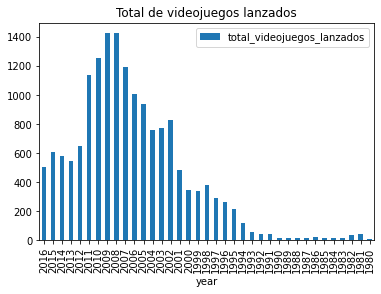

In [15]:
juegos_por_año.plot.bar(x= 'year', y= 'total_videojuegos_lanzados', title='Total de videojuegos lanzados')

La cantidad de juegos por año nos muestra que antes del 2002 la industria de los juegos tenia pocos desarrollos, luego de esta fecha empieza a tener una mayor producción de videojuegos por años y los años con mayor cantidad de video juegos fueron 2008 y 2009.

### La cantidad total de ventas por cada año.

In [16]:
# Construir una distribución basada en los datos de cada año
distribucion_por_año = games.groupby('year_of_release')['total_sales'].sum().reset_index()

display(distribucion_por_año)



,year_of_release,total_sales
0,1980,11.38
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,37.08
7,1987,21.70
8,1988,47.21
9,1989,73.45


<AxesSubplot:title={'center':'Ventas por año'}, xlabel='year_of_release'>

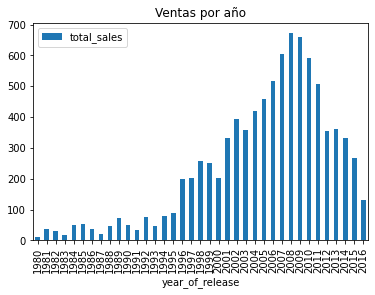

In [17]:
distribucion_por_año.plot.bar(x= 'year_of_release', y= 'total_sales', title='Ventas por año')

A partir del 2001 se ve un incremento en las ventas y los años con mayor numero de ventas es 2008 y 2009.

### Años de lanzamiento, último año en ventas, duración y promedio de duración de las plataformas.

In [18]:
# Año mínimo y máximo de lanzamiento por plataforma
año_min_max_por_plataforma = games.groupby('platform')['year_of_release'].agg(['min', 'max'])

año_min_max_por_plataforma['duracion'] = año_min_max_por_plataforma['max'] - año_min_max_por_plataforma['min'] 

año_min_max_por_plataforma = año_min_max_por_plataforma.rename(columns={'min': 'año_de_lanzamiento', 'max': 'año_de_desaparicion'})

año_min_max_por_plataforma = año_min_max_por_plataforma.reset_index()

promedio_duracion_plataforma = año_min_max_por_plataforma.mean()

display(año_min_max_por_plataforma)


,platform,año_de_lanzamiento,año_de_desaparicion,duracion
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


In [19]:
display(promedio_duracion_plataforma)

año_de_lanzamiento     1997.645161
año_de_desaparicion    2005.258065
duracion                  7.612903
dtype: float64

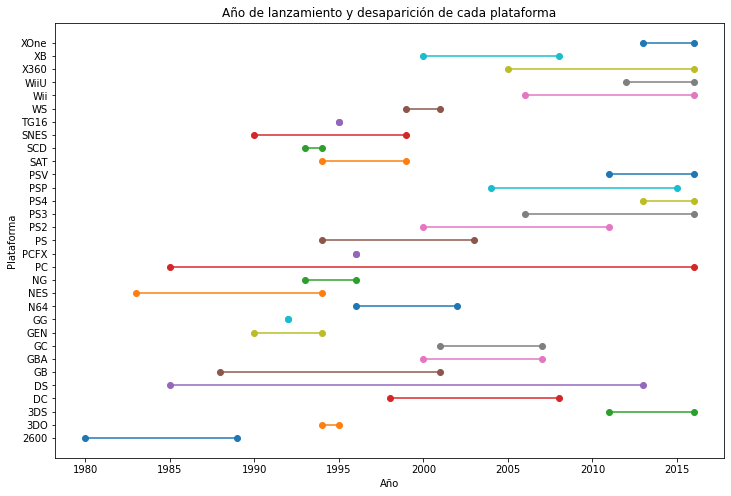

In [20]:
# gráfico de líneas para el año de lanzamiento y desaparición de cada plataforma
plt.figure(figsize=(12, 8))
for index, row in año_min_max_por_plataforma.iterrows():
    plt.plot([row['año_de_lanzamiento'], row['año_de_desaparicion']], [row['platform'], row['platform']], marker='o')
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.title('Año de lanzamiento y desaparición de cada plataforma')
plt.show()

**La duracion promedio de una plataforma es de 8 años en el mercado.**

La plataforma que mas ha durado en el mercado es el PC seguido DS

El año promedio de aparicion de las plataformas fue en 1997 y el de desaparicion fue 2006

### Plataformas que ya no tinen ventas

In [21]:
# Filtrar las plataformas que ya no tienen ventas
plataformas_sin_ventas = año_min_max_por_plataforma[año_min_max_por_plataforma['año_de_desaparicion'] < 2016]

# Calcular el promedio de duración para las nuevas y antiguas plataformas
promedio_duracion_nuevas = año_min_max_por_plataforma['duracion'].mean()  # Duración promedio de las plataformas que actualmente tienen ventas
promedio_duracion_antiguas = plataformas_sin_ventas['duracion'].mean()  # Duración promedio de las plataformas que ya no tienen ventas

In [22]:
#promedio de duración para las nuevas y antiguas plataformas

display(f'Duración promedio de las plataformas que actualmente tienen ventas: {promedio_duracion_nuevas}.')

display(f'Duración promedio de las plataformas que ya no tienen ventas: {promedio_duracion_antiguas}.')

'Duración promedio de las plataformas que actualmente tienen ventas: 7.612903225806452.'

'Duración promedio de las plataformas que ya no tienen ventas: 7.0.'

**Las plataformas que actualmnete no tienen ventas son:**

In [23]:
# Filtrar las plataformas que ya no tienen ventas
plataformas_sin_ventas = año_min_max_por_plataforma[año_min_max_por_plataforma['año_de_desaparicion'] < 2016]

display(plataformas_sin_ventas)

,platform,año_de_lanzamiento,año_de_desaparicion,duracion
0,2600,1980,1989,9
1,3DO,1994,1995,1
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0
10,N64,1996,2002,6


Como sabemos que el promedio de vida de una plataforma es de 8 años, podemos decir que todas las plataformas anteriores a 2008 son antiguas.

In [24]:
# Calcular el promedio de la duración de las plataformas nuevas
promedio_duracion_plataformas_nuevas = año_min_max_por_plataforma[año_min_max_por_plataforma['año_de_lanzamiento'] >= 2008]['duracion'].mean()


display(f'El tiempo promedio de duracion de las nuevas plataformas es: {promedio_duracion_plataformas_nuevas}.')

'El tiempo promedio de duracion de las nuevas plataformas es: 4.0.'

In [25]:
# Calcular el promedio de la duración de las plataformas antiguas
promedio_duracion_plataformas_antiguas = año_min_max_por_plataforma[año_min_max_por_plataforma['año_de_lanzamiento'] < 2008]['duracion'].mean()

display(f'El tiempo promedio de duracion de las plataformas antiguas es: {promedio_duracion_plataformas_antiguas}.')

'El tiempo promedio de duracion de las plataformas antiguas es: 8.307692307692308.'


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>Buen trabajo!!.</div>


### Plataformas con mayores ventas

In [26]:
# Calcular la suma de ventas totales para cada plataforma
ventas_totales_por_plataforma = games.groupby('platform')['total_sales'].sum()

display(ventas_totales_por_plataforma)

platform
2600      86.48
3DO        0.10
3DS      257.81
DC        15.95
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
GEN       28.35
GG         0.04
N64      218.01
NES      251.05
NG         1.44
PC       255.76
PCFX       0.03
PS       727.58
PS2     1233.56
PS3      931.34
PS4      314.14
PSP      289.53
PSV       53.81
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      891.18
WiiU      82.19
X360     961.24
XB       251.57
XOne     159.32
Name: total_sales, dtype: float64

In [27]:
# Organizar las plataformas de mayor a menor ventas
ventas_totales_por_plataforma = ventas_totales_por_plataforma.sort_values(ascending=False)

display(ventas_totales_por_plataforma)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [28]:
# Seleccionar las 8 primeras plataformas en ventas
primeras_plataformas = ventas_totales_por_plataforma.head(8)

display(primeras_plataformas)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
Name: total_sales, dtype: float64

<AxesSubplot:title={'center':'Plataformas con mayores ventas'}, xlabel='Plataforma', ylabel='Ventas totales (millones de dólares estadounidenses)'>

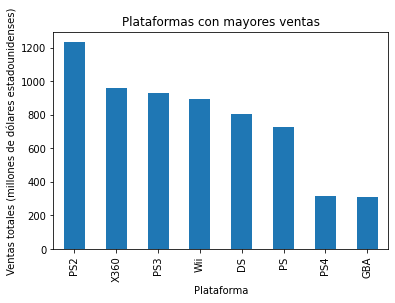

In [29]:
primeras_plataformas.plot(kind="bar",  
                          xlabel='Plataforma', 
                          ylabel='Ventas totales (millones de dólares estadounidenses)', 
                          title='Plataformas con mayores ventas')

Se escoge las plataformas que superen los 300 mil millones en ventas como las plataformas con las mayores ventas totales.

#### Ventas por año de las primeras plataformas en ventas**

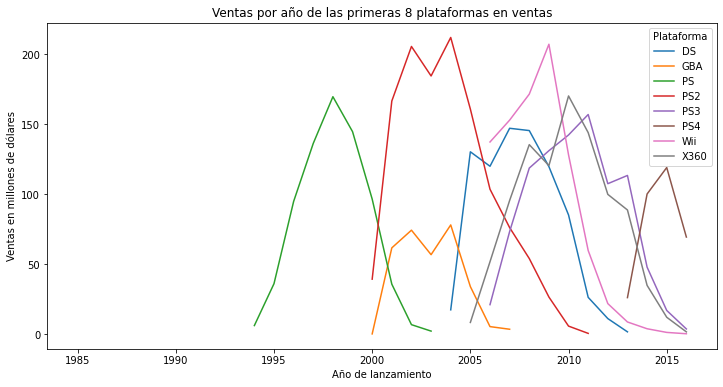

In [30]:
# Filtrar el games para las primeras 8 plataformas en ventas totales
top_platforms = primeras_plataformas.index.tolist()
df_top_platforms = games[games['platform'].isin(top_platforms)]

# Calcular la suma de ventas por año para las primeras 8 plataformas en ventas
ventas_por_año = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Gráfico que muestre las ventas por año de las primeras 8 plataformas en ventas
ventas_por_año.plot(figsize=(12, 6))
plt.title('Ventas por año de las primeras 8 plataformas en ventas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas en millones de dólares')
plt.legend(title='Plataforma')
plt.show()

**Al analizar las nuevas plataformas vemos que tienen un crecimiento exponencial en ventas y al llegar a un pico sus ventas empiezan a caer, este pico coincide con el lanzamiento de una nueva plataforma.**

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>Buen trabajo!!.</div>

#### Duracion de las primeras plataformas en ventas

In [31]:
#Ordenar las plataformas por ventas totales
top_platforms = primeras_plataformas.index[:8]  # Tomar las primeras 8 plataformas en ventas

#Filtrar el DataFrame de años por las primeras 8 plataformas
years_df = año_min_max_por_plataforma[año_min_max_por_plataforma['platform'].isin(top_platforms)]

#Obtener el año de lanzamiento y desaparición
for platform in top_platforms:
    platform_data = years_df[years_df['platform'] == platform]
    launch_year = platform_data['año_de_lanzamiento'].min()
    discontinuation_year = platform_data['año_de_desaparicion'].max()
    print(f"La plataforma {platform} tuvo su lanzamiento en el año {launch_year} y desapareció en el año {discontinuation_year}.")

La plataforma PS2 tuvo su lanzamiento en el año 2000 y desapareció en el año 2011.
La plataforma X360 tuvo su lanzamiento en el año 2005 y desapareció en el año 2016.
La plataforma PS3 tuvo su lanzamiento en el año 2006 y desapareció en el año 2016.
La plataforma Wii tuvo su lanzamiento en el año 2006 y desapareció en el año 2016.
La plataforma DS tuvo su lanzamiento en el año 1985 y desapareció en el año 2013.
La plataforma PS tuvo su lanzamiento en el año 1994 y desapareció en el año 2003.
La plataforma PS4 tuvo su lanzamiento en el año 2013 y desapareció en el año 2016.
La plataforma GBA tuvo su lanzamiento en el año 2000 y desapareció en el año 2007.


**Ventas totales de cada plataforma por año**

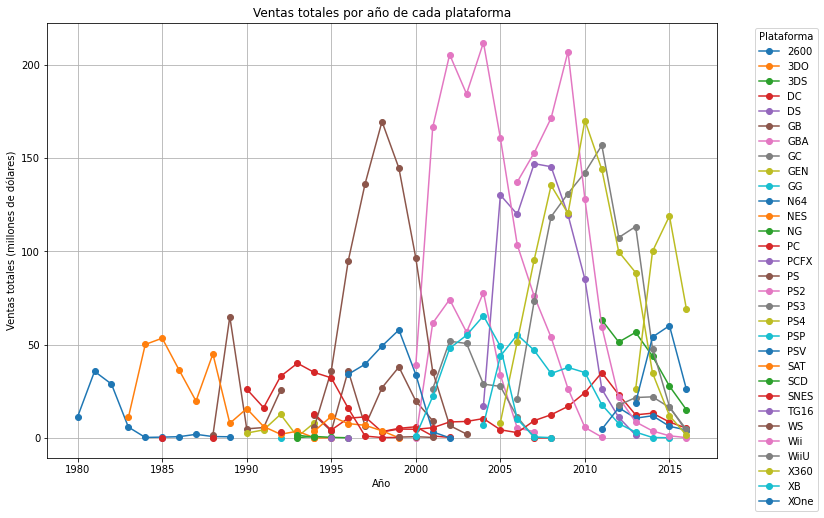

In [60]:
# Calcular las ventas totales por plataforma y año
ventas_por_año_y_plataforma = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Gráfico que relaciona las ventas totales por año de cada plataforma
ventas_por_año_y_plataforma.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Ventas totales por año de cada plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones de dólares)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>Buen trabajo!!.</div>

## Analisis de datos a partir de las plataformas con mas ventas

Primero filtramos la base de datos original para que nos queden solo los datos de las plataformas con mayores ventas.

In [33]:
# Obtener las primeras 8 plataformas en ventas totales
top_platforms = primeras_plataformas.index[:8] 

# Filtrar el DataFrame games por las primeras 8 plataformas
new_games_df = games[games['platform'].isin(top_platforms)]

display(new_games_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


### Diagrama de caja para las ventas globales desglosadas por plataforma

<Figure size 1440x360 with 0 Axes>

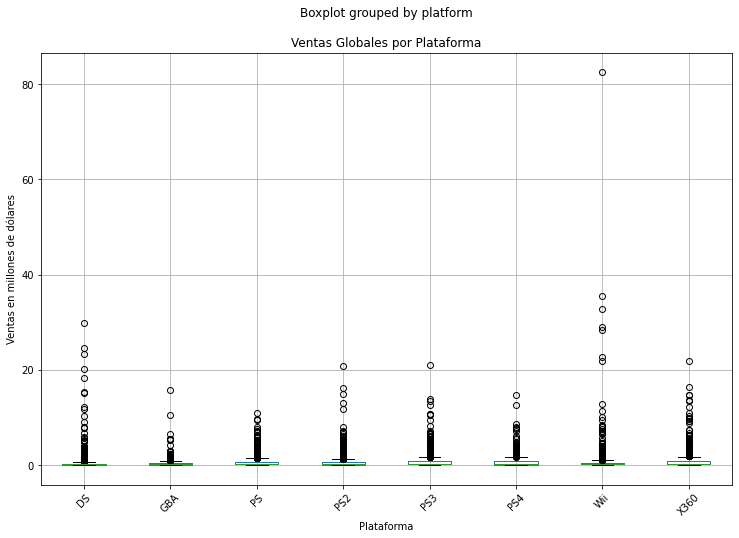

In [34]:
# Crear el diagrama de caja
plt.figure(figsize=(20, 5))
new_games_df.boxplot(column='total_sales', by='platform', figsize=(12, 8))
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas en millones de dólares')
plt.xticks(rotation=45)
plt.show()

Vemos que el promedio de ventas de las plataformas tiende a cero o valores muy bajos acompañado de valores atípicos, esto debido al comportamiento de las ventas, cuando en un inicio son pocas y crece exponencialmente y para luego caer. estos valores atípicos muestran los años con mayores ventas.

### Gráfico de dispersión y calcula la correlación entre las reseñas y las ventas para plataforma WII

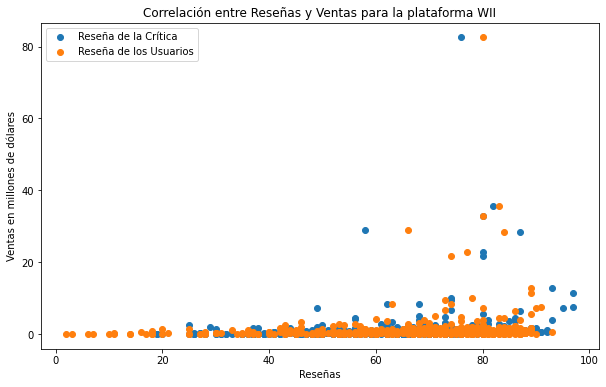

La correlación entre la reseña de la crítica y las ventas para la plataforma WII es: 0.1779072857759491
La correlación entre la reseña de los usuarios y las ventas para la plataforma WII es: 0.11283121360773772


In [35]:
# Filtrar los datos para la plataforma 'WII'
wii_data = new_games_df[new_games_df['platform'] == 'Wii']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(wii_data['critic_score'], wii_data['total_sales'], label='Reseña de la Crítica')
plt.scatter(wii_data['user_score']*10, wii_data['total_sales'], label='Reseña de los Usuarios')
plt.title('Correlación entre Reseñas y Ventas para la plataforma WII')
plt.xlabel('Reseñas')
plt.ylabel('Ventas en millones de dólares')
plt.legend()
plt.show()

# Calcular la correlación
correlacion_critic = wii_data['critic_score'].corr(wii_data['total_sales'])
correlacion_user = wii_data['user_score'].corr(wii_data['total_sales'])
print(f"La correlación entre la reseña de la crítica y las ventas para la plataforma WII es: {correlacion_critic}")
print(f"La correlación entre la reseña de los usuarios y las ventas para la plataforma WII es: {correlacion_user}")

Existe una relación positiva débil entre las reseñas que da tanto la crítica como los usuarios con las ventas para la plataforma WII. Lo que sugiere que los juegos con mejores reseñas de la crítica tienen más ventas, pero la relación no es muy fuerte. 

### Distribución general de los juegos por género

Cantidad de juegos por género: 

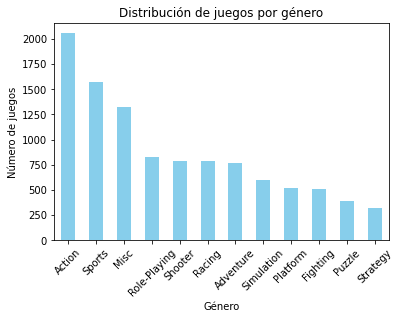

In [39]:
# Agrupo los datos por el género de los juegos y contar cuántos juegos hay en cada género
genre_counts = new_games_df['genre'].value_counts()

# Gráfico de barras para mostrar la distribución general de los juegos por género
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()

Ventas totales por género: 

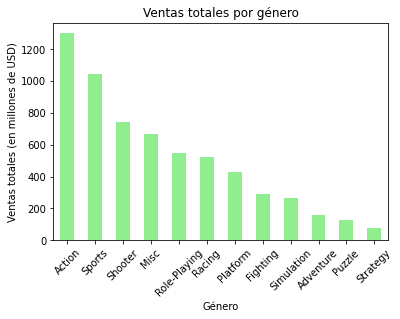

In [40]:
# Agrupo los datos por el género de los juegos y calcular las ventas totales por género
genre_total_sales = new_games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Gráfico de barras para mostrar la distribución general de las ventas totales por género
genre_total_sales.plot(kind='bar', color='lightgreen')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones de USD)')
plt.xticks(rotation=45)
plt.show()

La mayoría de los juegos que son lanzados al mercado pertenecen al género de acción, seguido por deportes y Misc. tanto acción como deportes también son los géneros con mayores ventas, aunque Misc ocupa el tercer lugar en cantidad de juegos, no ocupa el mismo puesto en ventas, como si lo hace el género Shooter, teniendo mayor ganancia estos a pesar del menor numero de juegos lanzados al mercado por este género.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>Excelente con el despliegue de datos quizas puedas agregar tambien el cuadro de datos pero en general estamos muy bien con el analisis que es lo importante.</div>

## **Perfil de usuario para cada región**

### Top 5 de plataformas con más ventas

In [41]:
sales_by_platform = games.groupby('platform')[['eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

In [42]:
top_eu_platforms = sales_by_platform['eu_sales'].sort_values(ascending=False).head(5)
top_na_platforms = sales_by_platform['na_sales'].sort_values(ascending=False).head(5)
top_jp_platforms = sales_by_platform['jp_sales'].sort_values(ascending=False).head(5)
top_other_platforms = sales_by_platform['other_sales'].sort_values(ascending=False).head(5)

In [43]:
display("Top 5 plataformas con más ventas en Europa:")
display(top_eu_platforms)

display("Top 5 plataformas con más ventas en Norte America:")
display(top_na_platforms)

display("Top 5 plataformas con más ventas en Japón:")
display(top_jp_platforms)

display("Top 5 plataformas con más ventas en otros países:")
display(top_other_platforms)

'Top 5 plataformas con más ventas en Europa:'

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

'Top 5 plataformas con más ventas en Norte America:'

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

'Top 5 plataformas con más ventas en Japón:'

platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64

'Top 5 plataformas con más ventas en otros países:'

platform
PS2     190.47
PS3     134.59
X360     84.88
Wii      77.71
DS       59.04
Name: other_sales, dtype: float64

Vemos que en cada región el top 5 de ventas cambia significativamente, teniendo cada región una plataforma favorita distinta, en Norte América la plataforma con mayores ventas es la X360 seguida muy de cerca por la PS2, a diferencia de Europa que la primera plataforma en ventas es la PS2 seguida de la PS3, este comportamiento se asemeja mucho a las ventas realizadas en otros países, en Japón los datos nos muestran una tendencia totalmente distinta, donde el líder en ventas es la plataforma DS seguida de PS.

### Principales generos en cada region

In [44]:
sales_by_genre = games.groupby('genre')[['eu_sales', 'na_sales', 'jp_sales', 'other_sales']].sum()

In [45]:
top_eu_genres = sales_by_genre['eu_sales'].nlargest(5)
top_na_genres = sales_by_genre['na_sales'].nlargest(5)
top_jp_genres = sales_by_genre['jp_sales'].nlargest(5)
top_other_genres = sales_by_genre['other_sales'].nlargest(5)

In [46]:
display("Cinco géneros principales en Europa:")
display(top_eu_genres)

display("Cinco géneros principales en Norte America:")
display(top_na_genres)

display("Cinco géneros principales en Japón:")
display(top_jp_genres)

display("Cinco géneros principales en otros países:")
display(top_other_genres)

'Cinco géneros principales en Europa:'

genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

'Cinco géneros principales en Norte America:'

genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

'Cinco géneros principales en Japón:'

genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64

'Cinco géneros principales en otros países:'

genre
Action     182.22
Sports     132.21
Shooter    103.33
Racing      75.51
Misc        73.10
Name: other_sales, dtype: float64

En cuanto géneros el comportamiento es muy similar al menos en los 3 principales géneros en las regiones de Europa, Norte América y otros países, siendo los tres principales géneros acción, deportes y Shooter. Japón tiene una tendencia diferente en cuanto géneros, siendo Role-Playing el primer genero seguido de acción y deportes.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>Buen trabajo!!.</div>

### Porcentaje de ventas por clasificación de ESRB y región

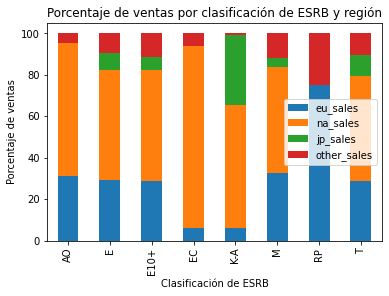

In [47]:
# Filtrar el DataFrame para obtener las columnas relevantes
df_filtered = games[['genre', 'eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'rating']]

# Calcular la suma de ventas para cada clasificación de ESRB en cada región
sales_by_rating = df_filtered.groupby('rating')[['eu_sales', 'na_sales', 'jp_sales', 'other_sales']].sum()

# Calcular los porcentajes de ventas para cada clasificación de ESRB en cada región
sales_percentages = sales_by_rating.div(sales_by_rating.sum(axis=1), axis=0) * 100

# Gráfico de barras apiladas que muestre los porcentajes de ventas para cada clasificación de ESRB en cada región
sales_percentages.plot(kind='bar', stacked=True)
plt.title('Porcentaje de ventas por clasificación de ESRB y región')
plt.xlabel('Clasificación de ESRB')
plt.ylabel('Porcentaje de ventas')
plt.show()

Vemos que gran porcentaje de los juegos vendidos en Europa tienen una clasificación RP a diferencia de Norteamérica que los juegos con clasificación EC son los más vendidos. En cuanto Japón los juegos con clasificación K-A tienen mayores ventas que los otros.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>Coincido con esta representación grafica y los comentarios.</div>

##  Prueba de hipótesis

### Clasificación de los usuarios de las plataformas Xbox y PC

**H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

**H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.**

In [48]:
# Eliminar los valores nulos de las columnas 'user_score' y 'name'
games_cleaned = games.dropna(subset=['user_score', 'name'])

# Filtrar el DataFrame para obtener únicamente las calificaciones de los usuarios y la plataforma Xbox One y PC
xbox_one_scores = games_cleaned.loc[games_cleaned['platform'] == 'XOne', 'user_score']
pc_scores = games_cleaned.loc[games_cleaned['platform'] == 'PC', 'user_score']

# Realizar un test de hipótesis para comparar las medias de las calificaciones de los usuarios entre las dos plataformas
t_stat, p_value = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

display(f"Estadístico t: {t_stat}, Valor p: {p_value}")

'Estadístico t: -4.671113961085972, Valor p: 4.5385802963771776e-06'

**En base a estos resultados, podemos concluir que la hipótesis nula es rechazada. Esto significa que hay evidencia suficiente para aceptar la hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.**

### Clasificación de los usuarios para los géneros de Acción y deportes.

**H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.**

**H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

In [49]:
# Eliminar los valores nulos de las columnas 'user_score' y 'name'
games_cleaned = games.dropna(subset=['user_score', 'name'])

# Filtrar los juegos de los géneros Action y Sports:
action_sports_games = games_cleaned[(games_cleaned['genre'] == 'Action') | (games_cleaned['genre'] == 'Sports')]

# Calcular las calificaciones promedio de los usuarios para cada género:
average_user_score_action = action_sports_games[action_sports_games['genre'] == 'Action']['user_score'].mean()
average_user_score_sports = action_sports_games[action_sports_games['genre'] == 'Sports']['user_score'].mean()

# Realizar un test de hipótesis para comparar las medias de las calificaciones de los usuarios entre las dos géneros
t_stat, p_value = st.ttest_ind(action_sports_games[action_sports_games['genre'] == 'Action']['user_score'], action_sports_games[action_sports_games['genre'] == 'Sports']['user_score'], equal_var=False)

display(f"Estadístico t: {t_stat}, Valor p: {p_value}")

'Estadístico t: 1.789373351094851, Valor p: 0.07370217419278534'

**En base a estos resultados, no podemos rechazar la hipótesis nula. Esto significa que no hay evidencia suficiente para aceptar la hipótesis alternativa. Por lo cual: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.**

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b>Excelente con el uso de la prueba de hipotesis, solamente te sugiero que muestres el calculo de la varianza para sustentar el uso del parametro equal_var.</div>

## Conclusión general

Inicialmente se recibe una base de datos llamada games, que abarca datos desde 1980 hasta 2016, sobre videojuegos, las plataformas de juego, sus vetas por regiones y la calificación de los usuarios y la crítica. Esta base de datos contaba inicialmente con 11 columnas, la cual se enriquece con una nueva columna con la suma de las ventas de todas las regiones. También se hace corrección de tipos de datos y eliminación de valores nulos.

En cuanto al análisis de datos llegamos a las siguientes conclusiones:

-	La cantidad de juegos por año nos muestra que antes del 2002 la industria de los juegos tenía pocos desarrollos, luego de esta fecha empieza a tener una mayor producción de videojuegos por años y los años con mayor cantidad de video juegos fueron 2008 y 2009.
-	A partir del 2001 se ve un incremento en las ventas y los años con mayor número de ventas es 2008 y 2009.
-	La duración promedio de una plataforma es de 8 años en el mercado.
-	La plataforma que más ha durado en el mercado es el PC seguido DS.
-	El año promedio de aparición de las plataformas fue en 1997 y el de desaparición fue 2006.
-	Partiendo del promedio de duración de una plataforma establecemos como plataformas antiguas todas aquellas lanzadas antes del 2008.

Las plataformas nuevas nos arrojan los siguientes datos:

-	El promedio de vida de una plataforma nueva es de 4 años y de las antiguas es de 8.
-	Se escoge las plataformas que superen los 300 mil millones en ventas como las plataformas con las mayores ventas totales. Siendo estas: PS2, X360, PS3, WII, DS, PS, PS4, GBA.
-	Al analizar las nuevas plataformas vemos que tienen un crecimiento exponencial en ventas y al llegar a un pico sus ventas empiezan a caer, este pico coincide con el lanzamiento de una nueva plataforma. Esta tendencia también se ve en todas las plataformas a lo largo del tiempo.
-	Vemos que el promedio de ventas de las nuevas plataformas tiende a cero o valores muy bajos acompañado de valores atípicos, esto debido al comportamiento de las ventas, cuando en un inicio son pocas y crece exponencialmente y para luego caer. estos valores atípicos muestran los años con mayores ventas.
-	Se escoge la plataforma WII para hacer un análisis de correlación entre las reseñas y las ventas, el cual nos muestra que: Existe una relación positiva débil entre las reseñas que da tanto la crítica como los usuarios con las ventas para la plataforma WII. Lo que sugiere que los juegos con mejores reseñas de la crítica tienen más ventas, pero la relación no es muy fuerte.
-	La mayoría de los juegos que son lanzados al mercado en las nuevas plataformas pertenecen al género de acción, seguido por deportes y Misc. tanto acción como deportes también son los géneros con mayores ventas, aunque Misc ocupa el tercer lugar en cantidad de juegos, no ocupa el mismo puesto en ventas, como si lo hace el género Shooter, teniendo mayor ganancia estos a pesar del menor número de juegos lanzados al mercado por este género.

Se crean perfiles de usuarios a partir de la región de ventas, lo cual nos muestra que:

-	Vemos que en cada región el top 5 de ventas cambia significativamente, teniendo cada región una plataforma favorita distinta, en Norte América la plataforma con mayores ventas es la X360 seguida muy de cerca por la PS2, a diferencia de Europa que la primera plataforma en ventas es la PS2 seguida de la PS3, este comportamiento se asemeja mucho a las ventas realizadas en otros países, en Japón los datos nos muestran una tendencia totalmente distinta, donde el líder en ventas es la plataforma DS seguida de PS.
-	En cuanto géneros el comportamiento es muy similar al menos en los 3 principales géneros en las regiones de Europa, Norte América y otros países, siendo los tres principales géneros acción, deportes y Shooter. Japón tiene una tendencia diferente en cuanto géneros, siendo Role-Playing el primer genero seguido de acción y deportes.
-	Vemos que gran porcentaje de los juegos vendidos en Europa tienen una clasificación RP a diferencia de Norteamérica que los juegos con clasificación EC son los más vendidos. En cuanto Japón los juegos con clasificación K-A tienen mayores ventas que los otros.

Partiendo de la base de datos se formulan algunas hipótesis y llegamos a las siguientes conclusiones:

-	Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
-	Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Buen trabajo! Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>